In [1]:
import datetime

from pprint import pprint
import numpy as np
import pandas as pd
from numba import jit, f8, i8, i4, b1, void

import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.graph_objs.scatter import Line
from plotly.graph_objs import Scatter

from scipy.io import loadmat
from sklearn.model_selection import train_test_split

In [3]:
mat = loadmat('ex6data1.mat')
X = mat['X']
y = mat['y']

X.shape, y.shape

((51, 2), (51, 1))

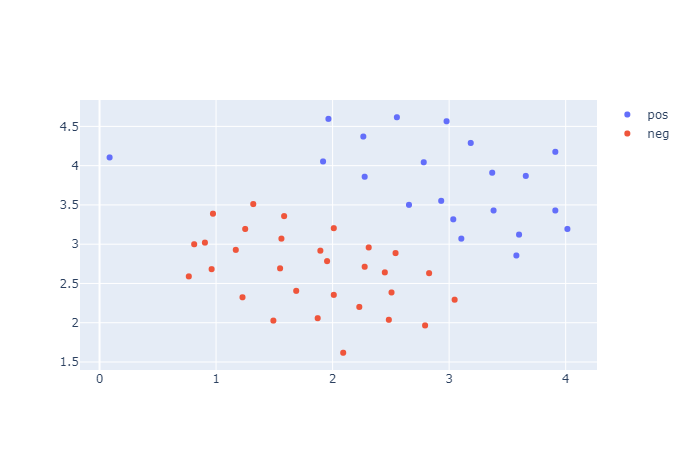

In [22]:
pos = X[(y == 1).ravel()]
neg = X[(y == 0).ravel()]

fig = go.Figure()
fig.add_trace(Scatter(x=pos[:, 0], y=pos[:, 1], mode="markers", name="pos"))
fig.add_trace(Scatter(x=neg[:, 0], y=neg[:, 1], mode="markers", name="neg"))
fig.show()

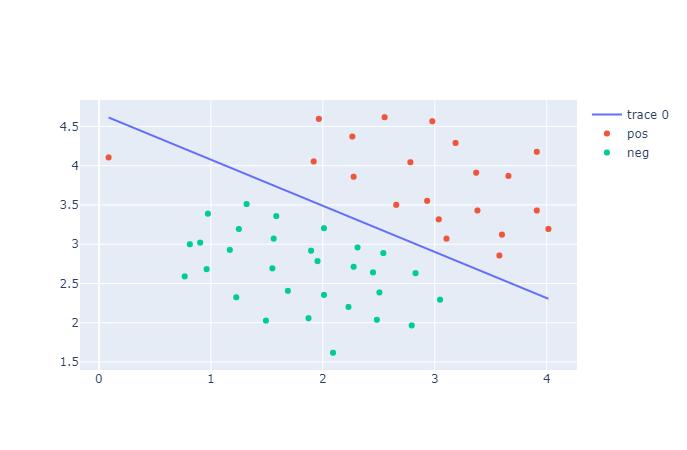

In [55]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1)
svc.fit(X, y.ravel())

w = svc.coef_[0]
b = svc.intercept_[0]
plot_x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
plot_y = -(w[0] * plot_x + b) / w[1]

fig = go.Figure()
fig.add_trace(Scatter(x=plot_x, y=plot_y))
fig.add_trace(Scatter(x=pos[:, 0], y=pos[:, 1], mode="markers", name="pos"))
fig.add_trace(Scatter(x=neg[:, 0], y=neg[:, 1], mode="markers", name="neg"))

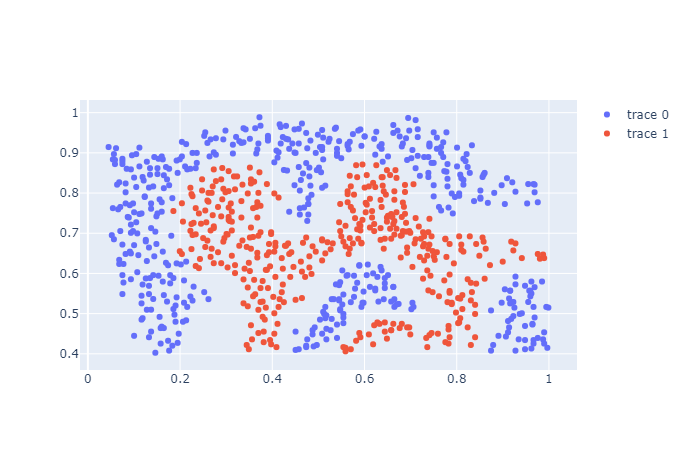

((863, 2), (863, 1), (480, 2), (383, 2))

In [65]:
mat = loadmat('ex6data2.mat')
X = mat['X']
y = mat['y']

pos = X[(y==1).ravel()]
neg = X[(y==0).ravel()]

fig = go.Figure()
fig.add_trace(Scatter(x=pos[:, 0], y=pos[:, 1], mode="markers"))
fig.add_trace(Scatter(x=neg[:, 0], y=neg[:, 1], mode="markers"))
fig.show()

X.shape, y.shape, pos.shape, neg.shape

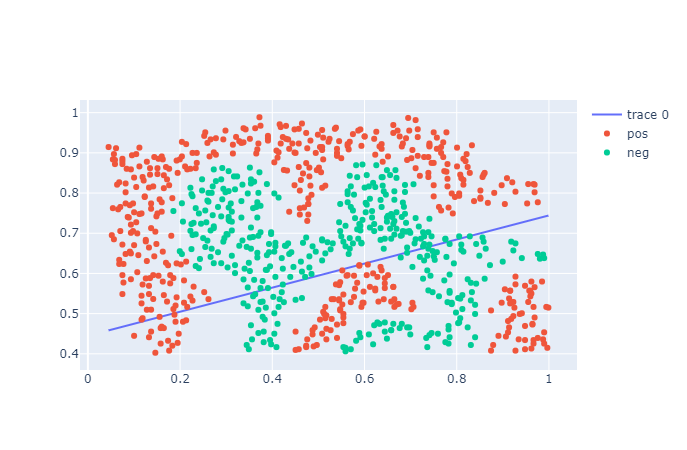

In [68]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1)
svc.fit(X, y.ravel())

w = svc.coef_[0]
b = svc.intercept_[0]
plot_x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
plot_y = -(w[0] * plot_x + b) / w[1]

fig = go.Figure()
fig.add_trace(Scatter(x=plot_x, y=plot_y))
fig.add_trace(Scatter(x=pos[:, 0], y=pos[:, 1], mode="markers", name="pos"))
fig.add_trace(Scatter(x=neg[:, 0], y=neg[:, 1], mode="markers", name="neg"))

0.9895712630359212


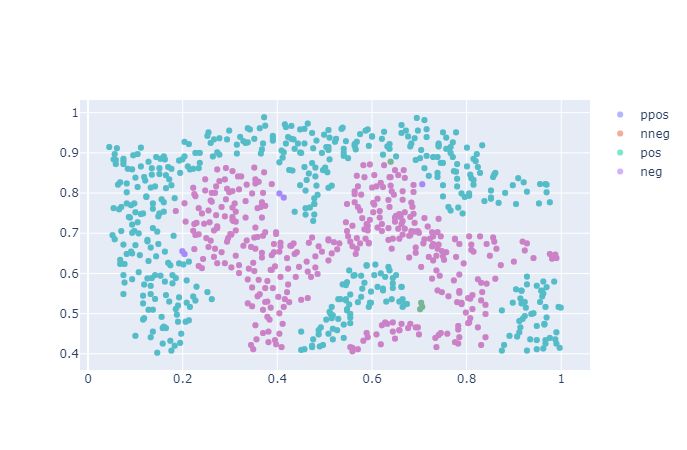

In [102]:
from sklearn.svm import SVC
sigma = 0.1
svc = SVC(C=1, kernel="rbf", gamma=1/(2*sigma**2), probability=True)
svc.fit(X, y.ravel())

predict_y = svc.predict(X)

print((predict_y == y.ravel()).mean())

ppos = X[(predict_y == 1)]
nneg = X[(predict_y == 0)]

# x1plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
# x2plot = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
# X1, X2 = np.meshgrid(x1plot, x2plot)
# vals = np.zeros(X1.shape)

# plot_x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
# print(plot_x.shape)
# plot_y =svc.predict_proba(X)
# plot_y = -(w[0] * plot_x + b) / w[1]

fig = go.Figure()
fig.add_trace(Scatter(x=ppos[:, 0], y=ppos[:, 1], mode="markers", name="ppos", opacity=0.5))
fig.add_trace(Scatter(x=nneg[:, 0], y=nneg[:, 1], mode="markers", name="nneg", opacity=0.5))
fig.add_trace(Scatter(x=pos[:, 0], y=pos[:, 1], mode="markers", name="pos", opacity=0.5))
fig.add_trace(Scatter(x=neg[:, 0], y=neg[:, 1], mode="markers", name="neg", opacity=0.5))

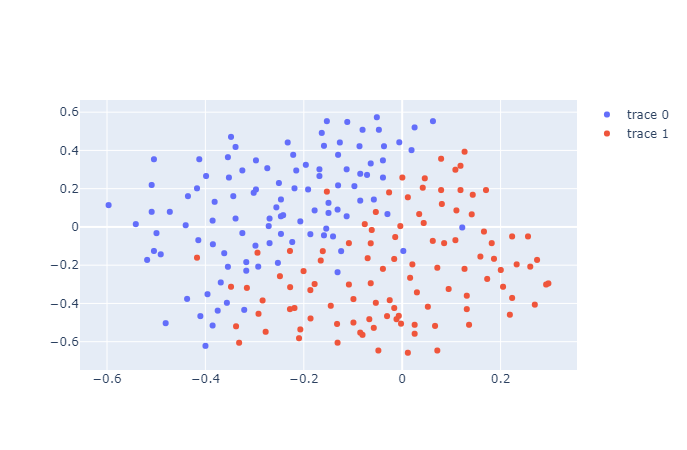

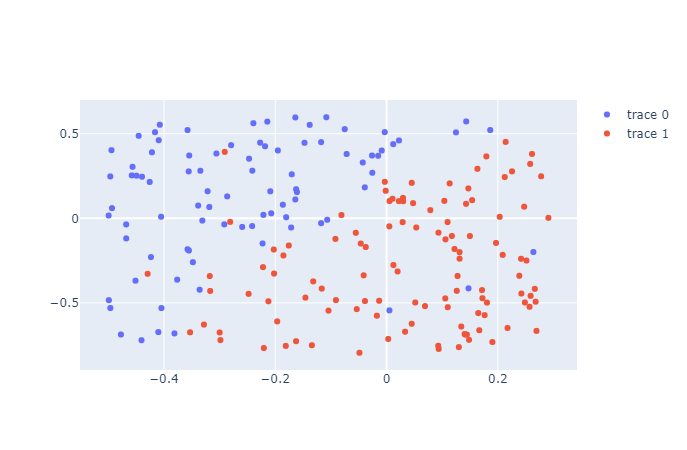

((211, 2), (211, 1), (87, 2), (113, 2))

In [109]:
mat = loadmat('ex6data3.mat')
# pprint(mat)

X = mat['X']
y = mat['y']
Xval = mat['Xval']
yval = mat['yval']

pos = X[(y==1).ravel()]
neg = X[(y==0).ravel()]

fig = go.Figure()
fig.add_trace(Scatter(x=pos[:, 0], y=pos[:, 1], mode="markers"))
fig.add_trace(Scatter(x=neg[:, 0], y=neg[:, 1], mode="markers"))
fig.show()

pos = Xval[(yval==1).ravel()]
neg = Xval[(yval==0).ravel()]

fig = go.Figure()
fig.add_trace(Scatter(x=pos[:, 0], y=pos[:, 1], mode="markers"))
fig.add_trace(Scatter(x=neg[:, 0], y=neg[:, 1], mode="markers"))
fig.show()

X.shape, y.shape, pos.shape, neg.shape

c:0.01, sigma:0.01, acc:0.435
c:0.01, sigma:0.03, acc:0.435
c:0.01, sigma:0.1, acc:0.435
c:0.01, sigma:0.3, acc:0.435
c:0.01, sigma:1, acc:0.435
c:0.01, sigma:3, acc:0.435
c:0.01, sigma:10, acc:0.435
c:0.01, sigma:30, acc:0.435
c:0.03, sigma:0.01, acc:0.435
c:0.03, sigma:0.03, acc:0.435
c:0.03, sigma:0.1, acc:0.45
c:0.03, sigma:0.3, acc:0.86
c:0.03, sigma:1, acc:0.62
c:0.03, sigma:3, acc:0.435
c:0.03, sigma:10, acc:0.435
c:0.03, sigma:30, acc:0.435
c:0.1, sigma:0.01, acc:0.435
c:0.1, sigma:0.03, acc:0.435
c:0.1, sigma:0.1, acc:0.945
c:0.1, sigma:0.3, acc:0.91
c:0.1, sigma:1, acc:0.825
c:0.1, sigma:3, acc:0.435
c:0.1, sigma:10, acc:0.435
c:0.1, sigma:30, acc:0.435
c:0.3, sigma:0.01, acc:0.435
c:0.3, sigma:0.03, acc:0.755
c:0.3, sigma:0.1, acc:0.96
c:0.3, sigma:0.3, acc:0.925
c:0.3, sigma:1, acc:0.89
c:0.3, sigma:3, acc:0.74
c:0.3, sigma:10, acc:0.435
c:0.3, sigma:30, acc:0.435
c:1, sigma:0.01, acc:0.605
c:1, sigma:0.03, acc:0.905
c:1, sigma:0.1, acc:0.965
c:1, sigma:0.3, acc:0.965
c:1, 

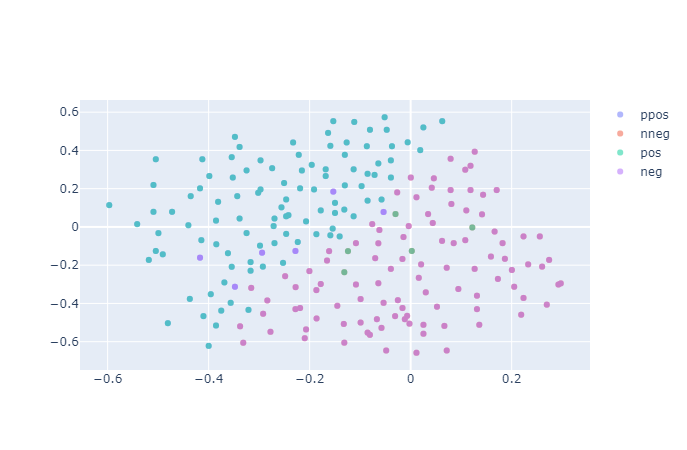

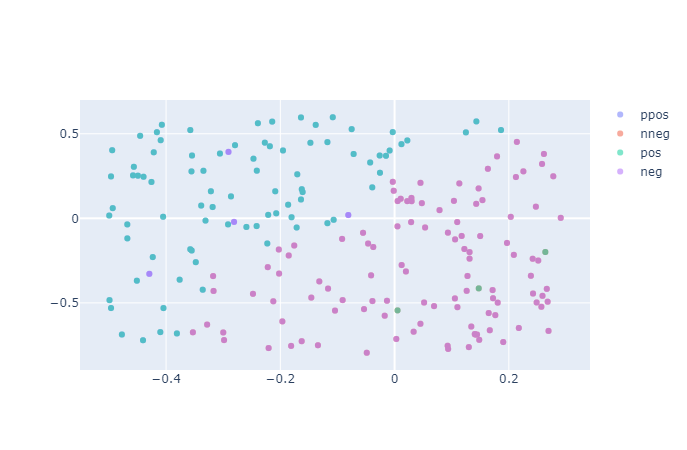

In [126]:
from sklearn.svm import SVC

params = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

good_c, good_sigma, good_acc = 0, 0, 0
for c in params:
    for sigma in params:       
        svc = SVC(C=c, kernel="rbf", gamma=1/(2*sigma**2), probability=True)
        svc.fit(X, y.ravel())

        predict_y = svc.predict(X)
        predict_yval = svc.predict(Xval)
        
        acc = (predict_y.reshape(-1, 1) == y).mean()
        acc_val = (predict_yval.reshape(-1, 1) == yval).mean()
        print(f'c:{c}, sigma:{sigma}, acc:{acc_val}')
        
        if good_acc < acc_val:
            good_acc = acc_val
            good_c = c
            good_sigma = sigma

# good_c, good_sigma, good_acc = 1, 0.1, 0
print(f'good_c:{good_c}, sigma:{good_sigma}, acc:{good_acc}')

svc = SVC(C=good_c, kernel="rbf", gamma=1/(2*good_sigma**2), probability=True)
svc.fit(X, y.ravel())

predict_y = svc.predict(X)
predict_yval = svc.predict(Xval)

print(predict_y.shape, y.shape)

print( (predict_y.reshape(-1, 1) == y).mean() )
print( (predict_yval.reshape(-1, 1) == yval).mean() )

pos = X[(y==1).ravel()]
neg = X[(y==0).ravel()]
ppos = X[(predict_y == 1)]
nneg = X[(predict_y == 0)]

fig = go.Figure()
fig.add_trace(Scatter(x=ppos[:, 0], y=ppos[:, 1], mode="markers", name="ppos", opacity=0.5))
fig.add_trace(Scatter(x=nneg[:, 0], y=nneg[:, 1], mode="markers", name="nneg", opacity=0.5))
fig.add_trace(Scatter(x=pos[:, 0], y=pos[:, 1], mode="markers", name="pos", opacity=0.5))
fig.add_trace(Scatter(x=neg[:, 0], y=neg[:, 1], mode="markers", name="neg", opacity=0.5))
fig.show()

pos = Xval[(yval==1).ravel()]
neg = Xval[(yval==0).ravel()]
ppos = Xval[(predict_yval == 1)]
nneg = Xval[(predict_yval == 0)]

fig = go.Figure()
fig.add_trace(Scatter(x=ppos[:, 0], y=ppos[:, 1], mode="markers", name="ppos", opacity=0.5))
fig.add_trace(Scatter(x=nneg[:, 0], y=nneg[:, 1], mode="markers", name="nneg", opacity=0.5))
fig.add_trace(Scatter(x=pos[:, 0], y=pos[:, 1], mode="markers", name="pos", opacity=0.5))
fig.add_trace(Scatter(x=neg[:, 0], y=neg[:, 1], mode="markers", name="neg", opacity=0.5))
fig.show()